## Dimensionality Reduction

## Outcomes

- Apply a Random Forest classification algorithm to MNIST dataset
- Perform dimensionality reduction of features using PCA and compare classification on the reduced dataset to that of original one
- Apply dimensionality reduction techniques: t-SNE and LLE

**Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import time
from sklearn.datasets import fetch_openml

# load the MNIST dataset

mnist = fetch_openml("mnist_784", version=1)
X = mnist.data / 255.0
y = mnist.target


In [4]:
#Split into a training set and a test set 

#Take the first 60,000 instances for training
X_train=X[:60000]
y_train=y[:60000]

#Take the remaining 10,000 instances for testing
X_test=X[60000:]
y_test=y[60000:]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


In [4]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

**Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.**

In [6]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import accuracy_score

time_start = time.time()

# Train a Random Forest classifier
rfc_model=rfc().fit(X_train,y_train)

print('Random Forest is done! Time elapsed: {} seconds'.format(time.time()-time_start))

C:\Users\User\Machine-Learning\Install\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest is done! Time elapsed: 7.95343017578125 seconds


In [7]:
# Evaluate the model on the test set
y_hat_rfc=rfc_model.predict(X_test)
print('Test accuracy for rfc classifier:', \
      round(accuracy_score(y_test, y_hat_rfc)*100, 2),'%')

Test accuracy for rfc classifier: 94.73 %


**Use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?**

In [8]:
from sklearn.decomposition import PCA

#Find the number of dimensions for an explained variance ratio of 95%
pca = PCA()
pca.fit(X_train)
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1

print('The number of dimensions required to preserve 95% of MNIST dataset variance is {}.'.format(d))

The number of dimensions required to preserve 95% of MNIST dataset variance is 154.


In [9]:
#Use PCA to reduce the dataset dimensionality to 154 dimesions 
pca_154f = PCA(n_components=154)
mnist154f = pca_154f.fit_transform(X_train)


In [10]:
time_start = time.time()

# Train a new Random Forest classifier on the reduced dataset and time it
rfc_model=rfc().fit(mnist154f,y_train)

print('Random Forest is done! Time elapsed: {} seconds'.format(time.time()-time_start))

C:\Users\User\Machine-Learning\Install\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest is done! Time elapsed: 16.943723440170288 seconds


In [11]:
# Evaluate the clissifier on the test set
X_test_reduced = pca_154f.transform(X_test)
y_hat_rfc=rfc_model.predict(X_test_reduced)

print('Test accuracy for rfc classifier:', \
      round(accuracy_score(y_test, y_hat_rfc)*100, 2),'%')

Test accuracy for rfc classifier: 89.26 %


**Conclusion**

Using RFC on the original dataset takes 7.95 seconds and the test accuracy is 94.73 %.
Using PCA to reduce the dimensions from 784 to 154 and then using RFC on the reduced dataset, takes 16.94 seconds and gives a test accuracy of 89.26 %.
This shows that reducing the dimensionof MNISt dataset with PCA does not improve the run time or the test accuracy. 

**Use t-SNE to reduce the MNIST dataset, show result graphically.**

In [12]:
from sklearn.manifold import TSNE

time_start = time.time()

#Use t-SNE to reduce the MNIST dataset into 2D
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_result = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 70000 samples in 97.566s...
[t-SNE] Computed neighbors for 70000 samples in 8311.946s...
[t-SNE] Computed conditional probabilities for sample 1000 / 70000
[t-SNE] Computed conditional probabilities for sample 2000 / 70000
[t-SNE] Computed conditional probabilities for sample 3000 / 70000
[t-SNE] Computed conditional probabilities for sample 4000 / 70000
[t-SNE] Computed conditional probabilities for sample 5000 / 70000
[t-SNE] Computed conditional probabilities for sample 6000 / 70000
[t-SNE] Computed conditional probabilities for sample 7000 / 70000
[t-SNE] Computed conditional probabilities for sample 8000 / 70000
[t-SNE] Computed conditional probabilities for sample 9000 / 70000
[t-SNE] Computed conditional probabilities for sample 10000 / 70000
[t-SNE] Computed conditional probabilities for sample 11000 / 70000
[t-SNE] Computed conditional probabilities for sample 12000 / 70000
[t-SNE] Computed conditional probabilities fo

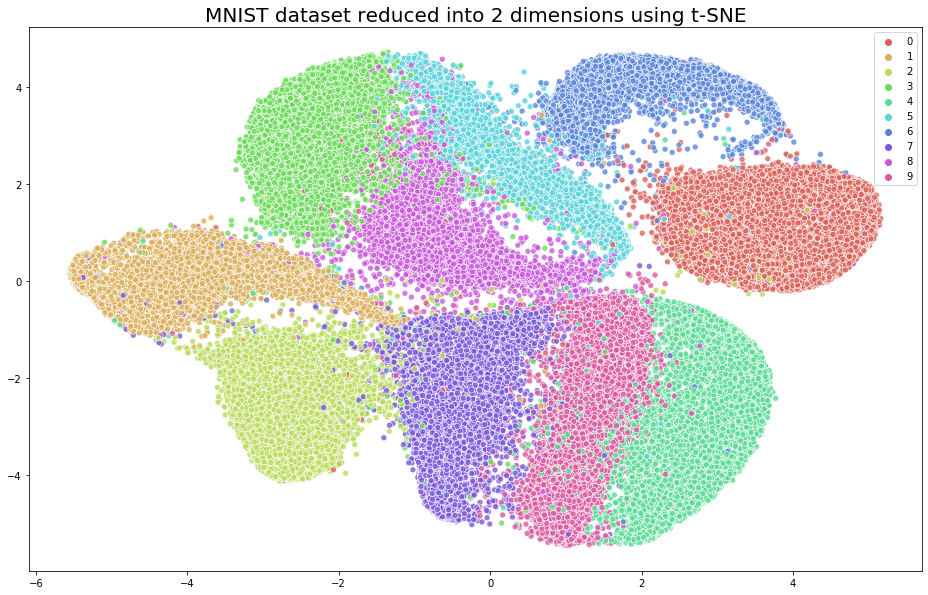

In [13]:
plt.figure(figsize=(16,10))
plt.title("MNIST dataset reduced into 2 dimensions using t-SNE",fontsize=20)

#MNIST dataset reduced into 2 dimensions using t-SNE
sns.scatterplot(tsne_result[:,0],tsne_result[:,1],hue=y,
                palette=sns.color_palette('hls',10),alpha=0.8)


**t-SNE on a subset of MNIST**

t-SNE run on the entire dataset of 70000 instances takes 151 min which is about 2.52 hours. 
To comapre t-SNE running time with LLE and MDS times, a smaller subset was used. Running LLE and MDS on the full data set takes a very long time.

In [5]:
from sklearn.manifold import TSNE
time_start = time.time()

#Use t-SNE to reduce the MNIST subset into 2D
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_result = tsne.fit_transform(X[:5000])

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.396s...
[t-SNE] Computed neighbors for 5000 samples in 38.207s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.336386
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.085327
[t-SNE] KL divergence after 300 iterations: 2.050709
t-SNE done! Time elapsed: 59.04783749580383 seconds


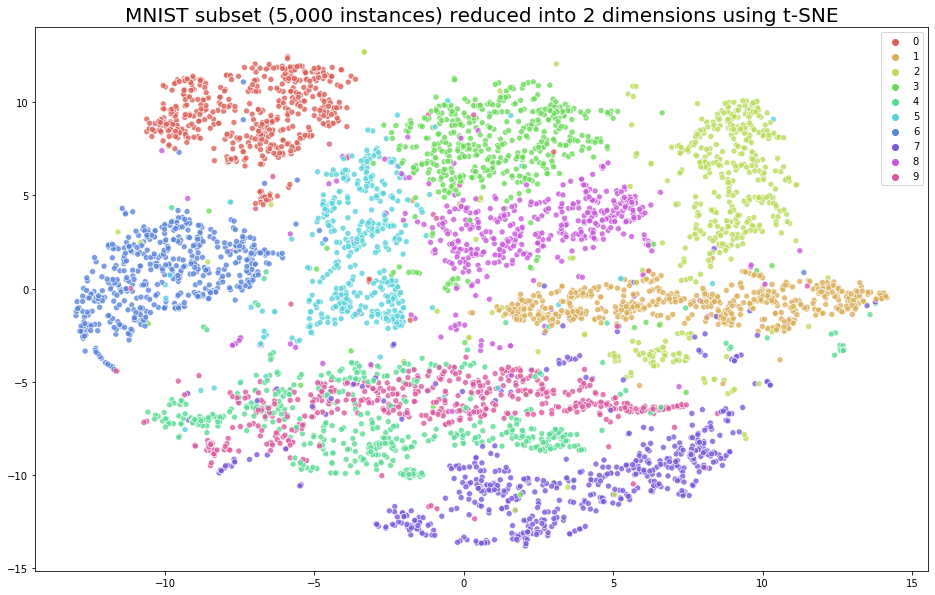

In [7]:
plt.figure(figsize=(16,10))
plt.title("MNIST subset (5,000 instances) reduced into 2 dimensions using t-SNE",fontsize=20)

#MNIST dataset reduced into 2 dimensions using t-SNE
sns.scatterplot(tsne_result[:,0],tsne_result[:,1],hue=y[:5000],
                palette=sns.color_palette('hls',10),alpha=0.8)


**Compare with other dimensionality methods: _Locally Linear Embedding_ (LLE) or _Multidimensional scaling_ (MDS).**

In [8]:
from sklearn.manifold import LocallyLinearEmbedding

time_start = time.time()

#Use LLE to reduce the MNIST subset into 2D
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
lle_result = lle.fit_transform(X[:5000])

print('LLE done! Time elapsed: {} seconds'.format(time.time()-time_start))

LLE done! Time elapsed: 44.78344917297363 seconds


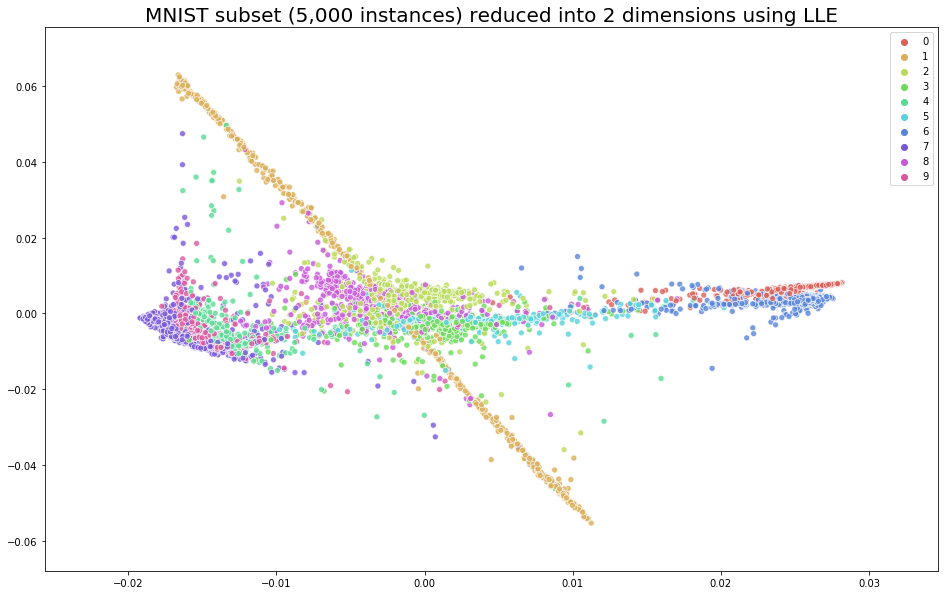

In [9]:
plt.figure(figsize=(16,10))
plt.title("MNIST subset (5,000 instances) reduced into 2 dimensions using LLE",fontsize=20)

sns.scatterplot(lle_result[:,0],lle_result[:,1],hue=y[:5000],
                palette=sns.color_palette('hls',10),alpha=0.8)

In [10]:
from sklearn.manifold import MDS

time_start = time.time()

#Use MSD to reduce the MNIST subset into 2D
mds = MDS(n_components=2, random_state=42)
mds_result = mds.fit_transform(X[:5000])

print('MDS done! Time elapsed: {} seconds'.format(time.time()-time_start))

MDS done! Time elapsed: 1403.637752532959 seconds


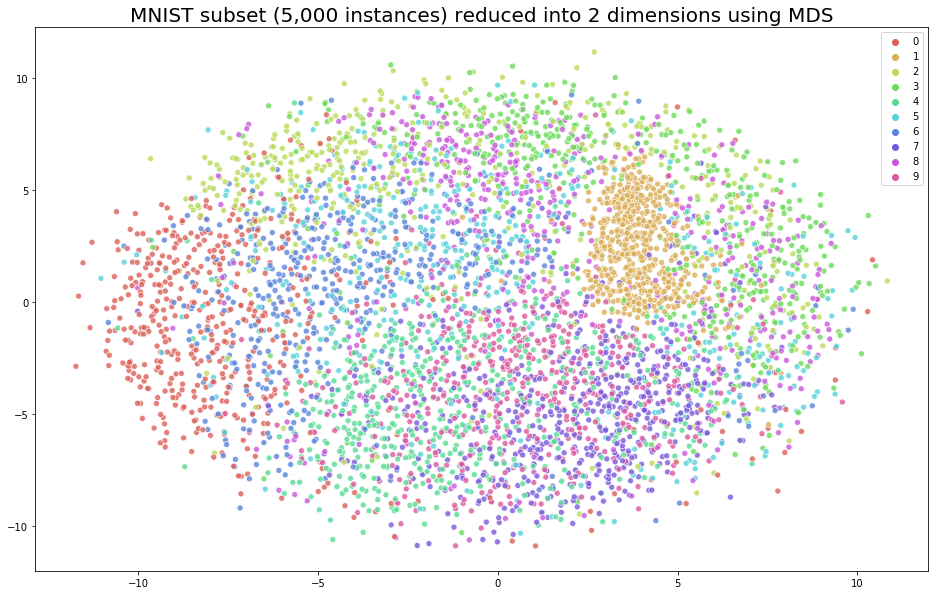

In [11]:
plt.figure(figsize=(16,10))
plt.title("MNIST subset (5,000 instances) reduced into 2 dimensions using MDS",fontsize=20)

sns.scatterplot(mds_result[:,0],mds_result[:,1],hue=y[:5000],
                palette=sns.color_palette('hls',10),alpha=0.8)

**Conclusion**

Comparing the run time on three different dimension reduction methods on the first 5000 instances of MNISt dataset gives the following timings:

t-SNE: 55.05 s

LLE:   44.78 s

MDS:   1403 s


Comparing the graphs from the three different methods shows that the t-SNE gives a very nice and distinct clasification on the numbers. LLE does the classification but it's not as distinct and as nice as t-SNE method. For MSD, although it takes much longer to run comapred the other two methods, the classification has too much overlaps and it is not a useful method for this datset. 

